In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

In [47]:
GM=1.0
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
    

  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
      
  def Arranque(self,dt):      
    self.r_old = self.r - dt*self.V + (dt**2/2)*(self.F/self.m)
    # self.r = self.r - dt*self.V + (dt**2/2)*self.F
          
  def Muevase(self,dt):      
    self.r_new = 2*self.r - self.r_old + (dt**2)*(self.F/self.m)
    self.V = (self.r_new - self.r_old)/(2*dt)
    self.r_old = self.r
    self.r = self.r_new  
      
      

In [48]:
#Condiciones Inicia;es
dt=1e-3
Nsteps=int(2e5)
StepsPerFrame=int(1e2)
Nframes=Nsteps//StepsPerFrame
r0 =10

In [49]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Planeta=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

Planeta.CalculeFuerza()
Planeta.Arranque(dt)


for i in range(Nsteps):
    t=i*dt
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        xdata[k]=Planeta.r[0]
        ydata[k]=Planeta.r[1]
    Planeta.CalculeFuerza()
    Planeta.Muevase(dt)

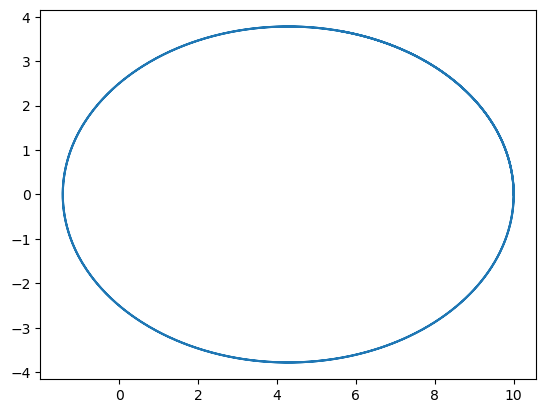

In [50]:
plt.plot(xdata,ydata)
plt.show()